# Volcanic Earthquakes and Tsunamis

## About The Project 

Volcanic tsunamis aren't limited to only a few areas around the globe. Entire ocean coastlines are at risk. This includes the 'Ring of Fire' that wraps around the pacific and central Atlantic. Considering Earth is more than 70% covered in water, and experiencing vigorous plate tectonic shifts, that leaves many coastal populations at risk of tsunamis. Detecting tsunamis caused by volcanic activity is incredibly difficult today. 

This project aims to analyze historic data about volcanos and how they are connected to earthquakes and tsunamis by analyzing attributes about the volcanic event. These attributes include explosion VEI, damage, injuries, date/time, (etc).

## Project Goals
The goal is to answer the following questions (but not limited to):
- Which type of volcano has been the deadliest?  
- Which type of volcano is the most active? Location? VEI?
- What time of year is the most active for volcanoes? By region?
- Which type of volcano tends to trigger tsunamis the most? 
- What are the signs or classified commonalities between tsunami triggered eruptions? 

## About The Data
The data is directly reported from the [NOAA](https://www.ngdc.noaa.gov/hazel/view/hazards/volcano/event-search) site.
The Significant Volcanic Eruption Database is a global listing of over 500 significant eruptions which includes information on the latitude, longitude, elevation, type of volcano, and last known eruption.

National Geophysical Data Center / World Data Service (NGDC/WDS): NCEI/WDS Global Significant Volcanic Eruptions Database. NOAA National Centers for Environmental Information.

Considering the lack of technology and tools to measure volcano activity, the data is filtered from year 0 to 2021. No additional filters are applied. 

In [1]:
# Importing libraries
## for data
import numpy as np
import pandas as pd

## for visualizations
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, linear_model, preprocessing, feature_selection, ensemble, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

In [2]:
# Importing the dataset

df = pd.read_csv('volcano-events0-21.csv')
df.head(5)

Year   Mo    Dy     Tsu    Eq            Name            Location  \
0   NaN  NaN   NaN     NaN   NaN             NaN                 NaN   
1  46.0  NaN   NaN    21.0   NaN       Santorini              Greece   
2  50.0  NaN   NaN     NaN   NaN          Ambrym  Vanuatu-SW Pacific   
3  60.0  NaN   NaN     NaN   NaN  Bona-Churchill            Alaska-E   
4  79.0  8.0  25.0  3093.0  58.0        Vesuvius               Italy   

         Country  Latitude  Longitude  ...  Total Deaths  \
0            NaN       NaN        NaN  ...           NaN   
1         Greece    36.404     25.396  ...           NaN   
2        Vanuatu   -16.250    168.120  ...           NaN   
3  United States    61.380   -141.750  ...           NaN   
4          Italy    40.821     14.426  ...        2100.0   

  Total Death Description  Total Missing Total Missing Description  \
0                     NaN            NaN                       NaN   
1                     NaN            NaN                       NaN   
2                     NaN            NaN                       NaN   
3                     NaN            NaN                       NaN   
4                     4.0            NaN                       NaN   

   Total Injuries  Total Injuries Description  Total Damage ($Mil)  \
0             NaN                         NaN                  NaN   
1             NaN                         NaN                  NaN   
2             NaN                         NaN                  NaN   
3             NaN                         NaN                  NaN   
4             NaN                         NaN                  NaN   

   Total Damage Description  Total Houses Destroyed  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   

   Total Houses Destroyed Description  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 34 columns]

In [3]:
# Identify the data types
print(df.info())

# Examine the shape of the data
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                812 non-null    float64
 1   Mo                                  710 non-null    float64
 2   Dy                                  648 non-null    float64
 3   Tsu                                 148 non-null    float64
 4   Eq                                  66 non-null     float64
 5   Name                                812 non-null    object 
 6   Location                            812 non-null    object 
 7   Country                             812 non-null    object 
 8   Latitude                            812 non-null    float64
 9   Longitude                           812 non-null    float64
 10  Elevation (m)                       812 non-null    float64
 11  Type                                812 non-n

In [4]:
# Checking if any row is missing any data.
df.isnull().sum()

Year                                    1
Mo                                    103
Dy                                    165
Tsu                                   665
Eq                                    747
Name                                    1
Location                                1
Country                                 1
Latitude                                1
Longitude                               1
Elevation (m)                           1
Type                                    1
VEI                                   172
Agent                                 346
Deaths                                385
Death Description                     262
Missing                               805
Missing Description                   802
Injuries                              719
Injuries Description                  695
Damage ($Mil)                         795
Damage Description                    587
Houses Destroyed                      779
Houses Destroyed Description      

After review, there is 1 volcano event that doesn't have an age. The record that has a null value for the year, also has a null value for location, country, lat, long, etc. This record does not help analysis and will be dropped.

To keep the default dataframe in tact, I've created a new dataframe and will clean up the data in this new dataframe. This is to ensure data is not skewed and can be compared after transformation.

## Data Quality
- Create new dataframe
- Rename columns (change abbreviations to defined full words)
- Change data types for columns
- Handle null/NaN values

There is only 1 record missing a year (and a number of key variables). This record doesn't help the analysis and will be dropped. 

Additionally, a number of the columns are either float or objects. After reviewing each column, the fields that are descriptive should be object instead of float.

In [5]:
# Create a new dataframe (keeping df integrity in tact). 
vdf = df

# Replace some field values. 
vdf.rename(columns={"Dy": "Day","Tsu": "TsunamiEvent", "Eq": "EarthquakeEvent", "VEI": "ExplosivityIndexVEI"}, inplace=True)
vdf.head(5)

Year   Mo   Day  TsunamiEvent  EarthquakeEvent            Name  \
0   NaN  NaN   NaN           NaN              NaN             NaN   
1  46.0  NaN   NaN          21.0              NaN       Santorini   
2  50.0  NaN   NaN           NaN              NaN          Ambrym   
3  60.0  NaN   NaN           NaN              NaN  Bona-Churchill   
4  79.0  8.0  25.0        3093.0             58.0        Vesuvius   

             Location        Country  Latitude  Longitude  ...  Total Deaths  \
0                 NaN            NaN       NaN        NaN  ...           NaN   
1              Greece         Greece    36.404     25.396  ...           NaN   
2  Vanuatu-SW Pacific        Vanuatu   -16.250    168.120  ...           NaN   
3            Alaska-E  United States    61.380   -141.750  ...           NaN   
4               Italy          Italy    40.821     14.426  ...        2100.0   

  Total Death Description  Total Missing Total Missing Description  \
0                     NaN            NaN                       NaN   
1                     NaN            NaN                       NaN   
2                     NaN            NaN                       NaN   
3                     NaN            NaN                       NaN   
4                     4.0            NaN                       NaN   

   Total Injuries  Total Injuries Description  Total Damage ($Mil)  \
0             NaN                         NaN                  NaN   
1             NaN                         NaN                  NaN   
2             NaN                         NaN                  NaN   
3             NaN                         NaN                  NaN   
4             NaN                         NaN                  NaN   

   Total Damage Description  Total Houses Destroyed  \
0                       NaN                     NaN   
1                       NaN                     NaN   
2                       NaN                     NaN   
3                       NaN                     NaN   
4                       NaN                     NaN   

   Total Houses Destroyed Description  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 34 columns]

In [6]:
# Remove the row with the missing data.
vdf = vdf.dropna(axis=0, subset=['Year'])

In [7]:
# Convert float fields that should contain strings to object type.
convert_obj = {'Death Description': object, 
                'Missing Description': object,
               'Injuries Description': object,
               'Damage Description': object,
               'Houses Destroyed Description': object,
               'Total Death Description': object,
               'Total Missing Description': object,
               'Total Injuries Description': object,
               'Total Damage Description': object,
               'Total Houses Destroyed Description': object
               } 
  
vdf = vdf.astype(convert_obj)

In [8]:
# Replace all NaN values with 0 - float fields. 
vdf['Mo'] = vdf['Mo'].fillna(0)
vdf['Day'] = vdf['Day'].fillna(0)
vdf['TsunamiEvent'] = vdf['TsunamiEvent'].fillna(0)
vdf['EarthquakeEvent'] = vdf['EarthquakeEvent'].fillna(0)
vdf['ExplosivityIndexVEI'] = vdf['ExplosivityIndexVEI'].fillna(0) 
vdf['Deaths'] = vdf['Deaths'].fillna(0) 
vdf['Agent'] = vdf['Agent'].fillna(0)  
vdf['Missing'] = vdf['Missing'].fillna(0)   
vdf['Injuries'] = vdf['Injuries'].fillna(0)
vdf['Damage ($Mil)'] = vdf['Damage ($Mil)'].fillna(0)    
vdf['Houses Destroyed'] = vdf['Houses Destroyed'].fillna(0)
vdf['Total Deaths'] = vdf['Total Deaths'].fillna(0)
vdf['Total Missing'] = vdf['Total Missing'].fillna(0) 
vdf['Total Injuries'] = vdf['Total Injuries'].fillna(0)
vdf['Total Damage ($Mil)'] = vdf['Total Damage ($Mil)'].fillna(0) 
vdf['Total Houses Destroyed'] = vdf['Total Houses Destroyed'].fillna(0)

# Fill object fields with new string for NaN values
vdf['Death Description'] = vdf['Death Description'].fillna('None')
vdf['Missing Description'] = vdf['Missing Description'].fillna('None') 
vdf['Injuries Description'] = vdf['Injuries Description'].fillna('None') 
vdf['Damage Description'] = vdf['Damage Description'].fillna('None') 
vdf['Houses Destroyed Description'] = vdf['Houses Destroyed Description'].fillna('None')  
vdf['Total Death Description'] = vdf['Total Death Description'].fillna('None') 
vdf['Total Missing Description'] = vdf['Total Missing Description'].fillna('None') 
vdf['Total Injuries Description'] = vdf['Total Injuries Description'].fillna('None') 
vdf['Total Damage Description'] = vdf['Total Damage Description'].fillna('None')  
vdf['Total Houses Destroyed Description'] = vdf['Total Houses Destroyed Description'].fillna('None') 

# Check dataframe
vdf.head(5)

Year   Mo   Day  TsunamiEvent  EarthquakeEvent             Name  \
1   46.0  0.0   0.0          21.0              0.0        Santorini   
2   50.0  0.0   0.0           0.0              0.0           Ambrym   
3   60.0  0.0   0.0           0.0              0.0   Bona-Churchill   
4   79.0  8.0  25.0        3093.0             58.0         Vesuvius   
5  200.0  0.0   0.0           0.0              0.0  Arhab, Harra of   

             Location        Country  Latitude  Longitude  ...  Total Deaths  \
1              Greece         Greece    36.404     25.396  ...           0.0   
2  Vanuatu-SW Pacific        Vanuatu   -16.250    168.120  ...           0.0   
3            Alaska-E  United States    61.380   -141.750  ...           0.0   
4               Italy          Italy    40.821     14.426  ...        2100.0   
5            Arabia-S          Yemen    15.630     44.080  ...           0.0   

  Total Death Description  Total Missing Total Missing Description  \
1                    None            0.0                      None   
2                    None            0.0                      None   
3                    None            0.0                      None   
4                       4            0.0                      None   
5                    None            0.0                      None   

   Total Injuries Total Injuries Description  Total Damage ($Mil)  \
1             0.0                       None                  0.0   
2             0.0                       None                  0.0   
3             0.0                       None                  0.0   
4             0.0                       None                  0.0   
5             0.0                       None                  0.0   

  Total Damage Description  Total Houses Destroyed  \
1                     None                     0.0   
2                     None                     0.0   
3                     None                     0.0   
4                     None                     0.0   
5                        1                     0.0   

  Total Houses Destroyed Description  
1                               None  
2                               None  
3                               None  
4                               None  
5                               None  

[5 rows x 34 columns]

In [9]:
# Check for null or NaN values - Should all return 0
vdf.isnull().sum()

Year                                  0
Mo                                    0
Day                                   0
TsunamiEvent                          0
EarthquakeEvent                       0
Name                                  0
Location                              0
Country                               0
Latitude                              0
Longitude                             0
Elevation (m)                         0
Type                                  0
ExplosivityIndexVEI                   0
Agent                                 0
Deaths                                0
Death Description                     0
Missing                               0
Missing Description                   0
Injuries                              0
Injuries Description                  0
Damage ($Mil)                         0
Damage Description                    0
Houses Destroyed                      0
Houses Destroyed Description          0
Total Deaths                          0


In [10]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 1 to 812
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                812 non-null    float64
 1   Mo                                  812 non-null    float64
 2   Day                                 812 non-null    float64
 3   TsunamiEvent                        812 non-null    float64
 4   EarthquakeEvent                     812 non-null    float64
 5   Name                                812 non-null    object 
 6   Location                            812 non-null    object 
 7   Country                             812 non-null    object 
 8   Latitude                            812 non-null    float64
 9   Longitude                           812 non-null    float64
 10  Elevation (m)                       812 non-null    float64
 11  Type                                812 non-n

## Visualizations

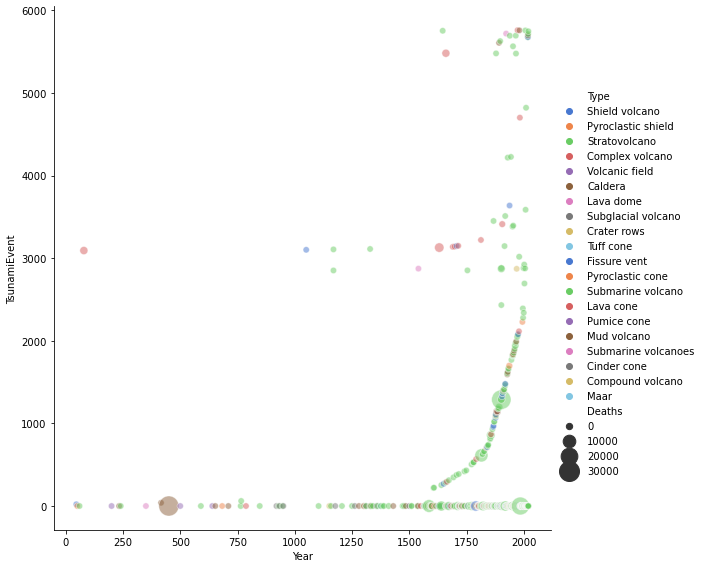

In [11]:
sns.relplot(x="Year", y="TsunamiEvent", hue="Type", size="Deaths",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=vdf )

In [12]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = vdf['Type'],
    xbins=dict( 
        start=1,
        end=1000,
        size=1
    ), 
    opacity=1
))

fig.update_layout(
    title_text='Type',
    xaxis_title_text='Type',
    yaxis_title_text='Count', 
    bargap=0.10,
    xaxis =  {'showgrid': True },
    yaxis = {'showgrid': True },
    template = 'plotly'
)

fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = vdf['Country'],
    xbins=dict( 
        start=1,
        end=1000,
        size=1
    ), 
    opacity=1
))

fig.update_layout(
    title_text='Location',
    xaxis_title_text='Location',
    yaxis_title_text='Count', 
    bargap=0.10,
    xaxis =  {'showgrid': True },
    yaxis = {'showgrid': True },
    template = 'plotly'
)

fig.show()

In [14]:
v_types = vdf['ExplosivityIndexVEI'].value_counts().reset_index()
v_types.columns = ['ExplosivityIndexVEI', 'count']
fig = px.bar(v_types, x='ExplosivityIndexVEI', y="count", orientation='v', title='Count of volcano types', width=500)
fig.show()

In [15]:
# Compare deaths over time across all volcano activities.
map_vdf = vdf #.query("TsunamiEvent >= 1")
fig = px.scatter(map_vdf, 
                 x="Year", 
                 y="Total Deaths", 
                 color="Country",
                 hover_name="Name", 
                 hover_data=["Type",
                             "Country", 
                             "Year", 
                             "Total Deaths",
                             "EarthquakeEvent",
                             "TsunamiEvent",
                             "ExplosivityIndexVEI"])

fig.show()

In [16]:
#map_vdf = vdf #.query("Deaths >= 1")
fig = px.scatter_geo(map_vdf, lat="Latitude", lon="Longitude",
                     color="Type",
                     hover_name="Name", 
                     size="ExplosivityIndexVEI", 
                     hover_data=["Country",
                                 "Year",
                                 "Total Deaths",
                                 "EarthquakeEvent", 
                                 "TsunamiEvent",
                                 "ExplosivityIndexVEI"],
                     #animation_frame="Year",
                     projection="natural earth")
fig.update_layout(mapbox_style="stamen-terrain")
fig.show()

In [17]:
# Subplot variables about volcano activity 
fig = make_subplots(rows=2, cols=1, start_cell="top-left",  subplot_titles=("ExplosivityIndexVEI by Type","Deaths by Country"))
fig.add_trace(go.Box(y=vdf['ExplosivityIndexVEI'], x=vdf['Type'],boxpoints='all', name='ExplosivityIndexVEI'), row=1, col=1)
fig.add_trace(go.Box(y=vdf['Total Deaths'], x=vdf['Country'],boxpoints='all', name='Country'), row=2, col=1) 
fig.update_layout(height=1000, width=600, showlegend=False) 
fig.show()

## Correlation
Analyzing the data correlation across variables.

In [18]:
#Correlation matrix 
corr = vdf.corr()
corr

Year        Mo       Day  TsunamiEvent  \
Year                    1.000000  0.298575  0.279994      0.040572   
Mo                      0.298575  1.000000  0.300593      0.027775   
Day                     0.279994  0.300593  1.000000      0.109677   
TsunamiEvent            0.040572  0.027775  0.109677      1.000000   
EarthquakeEvent         0.007654  0.044234  0.112632      0.271594   
Latitude               -0.210532  0.006337 -0.000118     -0.004275   
Longitude               0.077175  0.018060 -0.010991     -0.037776   
Elevation (m)           0.076239  0.012847  0.010048     -0.279383   
ExplosivityIndexVEI    -0.288565 -0.065698 -0.052148     -0.052897   
Deaths                 -0.105133 -0.014224 -0.042523      0.009901   
Missing                 0.027309  0.020760  0.024655     -0.020432   
Injuries                0.029839  0.043169  0.008194     -0.012882   
Damage ($Mil)           0.031514  0.004184  0.042120      0.104517   
Houses Destroyed        0.035840 -0.035716  0.043804     -0.010869   
Total Deaths           -0.074671 -0.011114 -0.008894      0.032434   
Total Missing           0.027398  0.021016  0.024780     -0.019699   
Total Injuries          0.030518  0.070626  0.034580      0.157762   
Total Damage ($Mil)     0.035226  0.014305  0.048108      0.123124   
Total Houses Destroyed  0.033632 -0.020542  0.058218      0.027340   

                        EarthquakeEvent  Latitude  Longitude  Elevation (m)  \
Year                           0.007654 -0.210532   0.077175       0.076239   
Mo                             0.044234  0.006337   0.018060       0.012847   
Day                            0.112632 -0.000118  -0.010991       0.010048   
TsunamiEvent                   0.271594 -0.004275  -0.037776      -0.279383   
EarthquakeEvent                1.000000 -0.004187  -0.057394      -0.048024   
Latitude                      -0.004187  1.000000  -0.159637      -0.083769   
Longitude                     -0.057394 -0.159637   1.000000      -0.255862   
Elevation (m)                 -0.048024 -0.083769  -0.255862       1.000000   
ExplosivityIndexVEI           -0.036430  0.076072  -0.060238       0.060950   
Deaths                        -0.001398 -0.039544  -0.070738       0.023627   
Missing                        0.095915 -0.006482  -0.028214      -0.022439   
Injuries                      -0.010784 -0.019352  -0.035645       0.098991   
Damage ($Mil)                  0.114814  0.029995  -0.068908       0.019690   
Houses Destroyed               0.008743 -0.021400   0.045678      -0.026902   
Total Deaths                  -0.005716 -0.033859  -0.026588       0.020535   
Total Missing                  0.095881 -0.006608  -0.028120      -0.022572   
Total Injuries                -0.010826 -0.032991   0.006575      -0.003197   
Total Damage ($Mil)            0.124627  0.027984  -0.066974       0.017251   
Total Houses Destroyed         0.018128 -0.013096   0.058009      -0.038871   

                        ExplosivityIndexVEI    Deaths   Missing  Injuries  \
Year                              -0.288565 -0.105133  0.027309  0.029839   
Mo                                -0.065698 -0.014224  0.020760  0.043169   
Day                               -0.052148 -0.042523  0.024655  0.008194   
TsunamiEvent                      -0.052897  0.009901 -0.020432 -0.012882   
EarthquakeEvent                   -0.036430 -0.001398  0.095915 -0.010784   
Latitude                           0.076072 -0.039544 -0.006482 -0.019352   
Longitude                         -0.060238 -0.070738 -0.028214 -0.035645   
Elevation (m)                      0.060950  0.023627 -0.022439  0.098991   
ExplosivityIndexVEI                1.000000  0.175110  0.061151  0.017285   
Deaths                             0.175110  1.000000  0.027496  0.435271   
Missing                            0.061151  0.027496  1.000000 -0.001957   
Injuries                           0.017285  0.435271 -0.001957  1.000000   
Damage ($Mil)                      0.037733 -

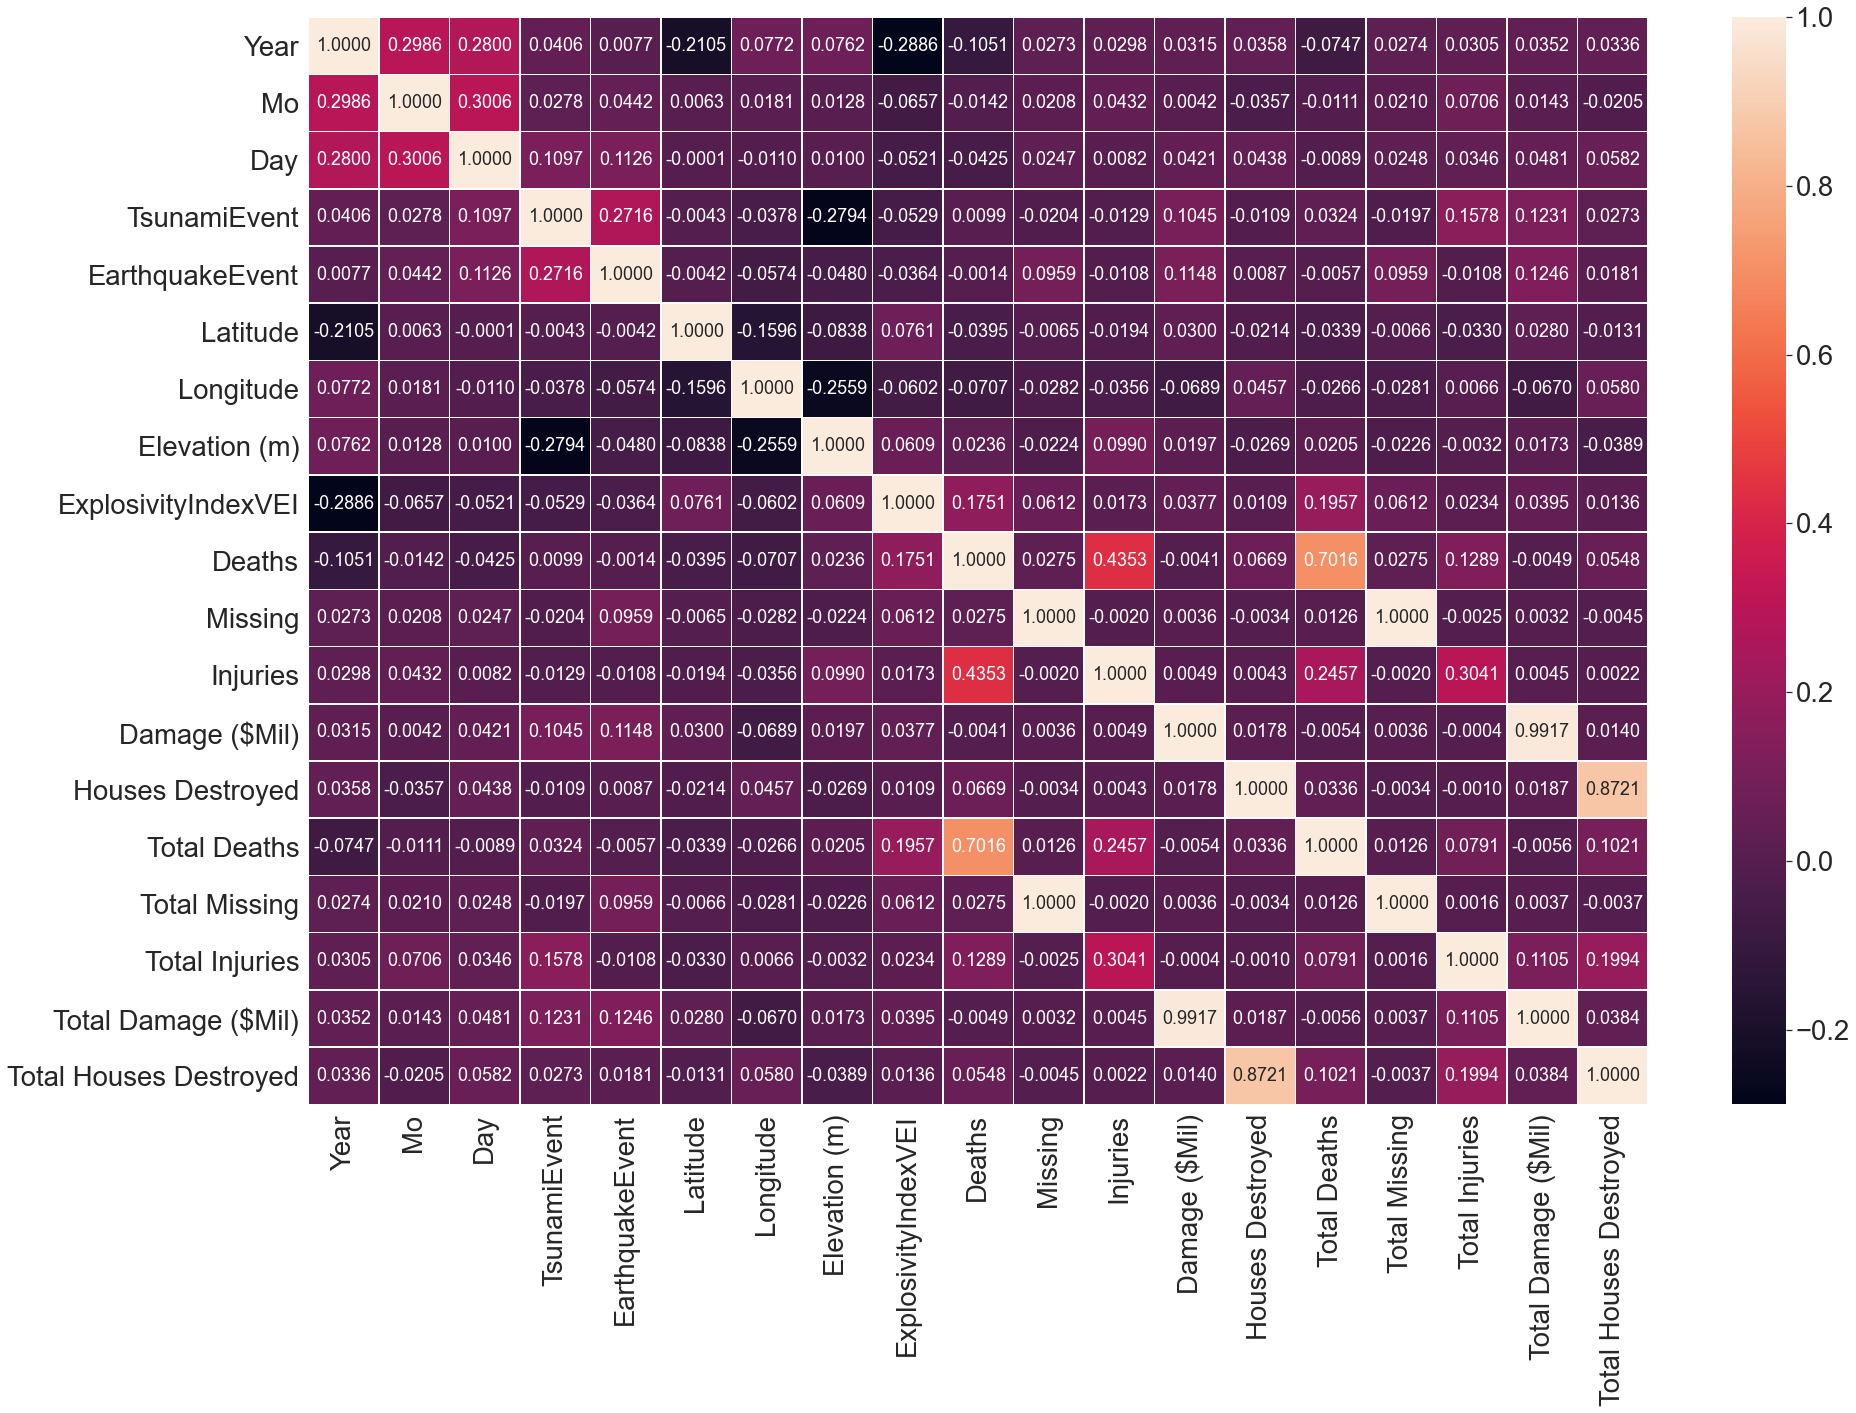

In [19]:
plt.rcParams['figure.figsize'] = (30.0, 20.0)
sns.set(font_scale=2.5)
ax = sns.heatmap(corr, annot=True, fmt='.4f', linewidths=.5, 
                 annot_kws={'size': 18})

In [20]:
# create a copy of the dataframe, and add columns for month and year
death_exp_corr = vdf.copy()
#df_m['month'] = [i.month for i in df_m.index]
#df_m['year'] = [i.year for i in df_m.index]

# group by year and explositivity index, get the average
death_exp_corr = death_exp_corr.groupby(['Type']).mean()

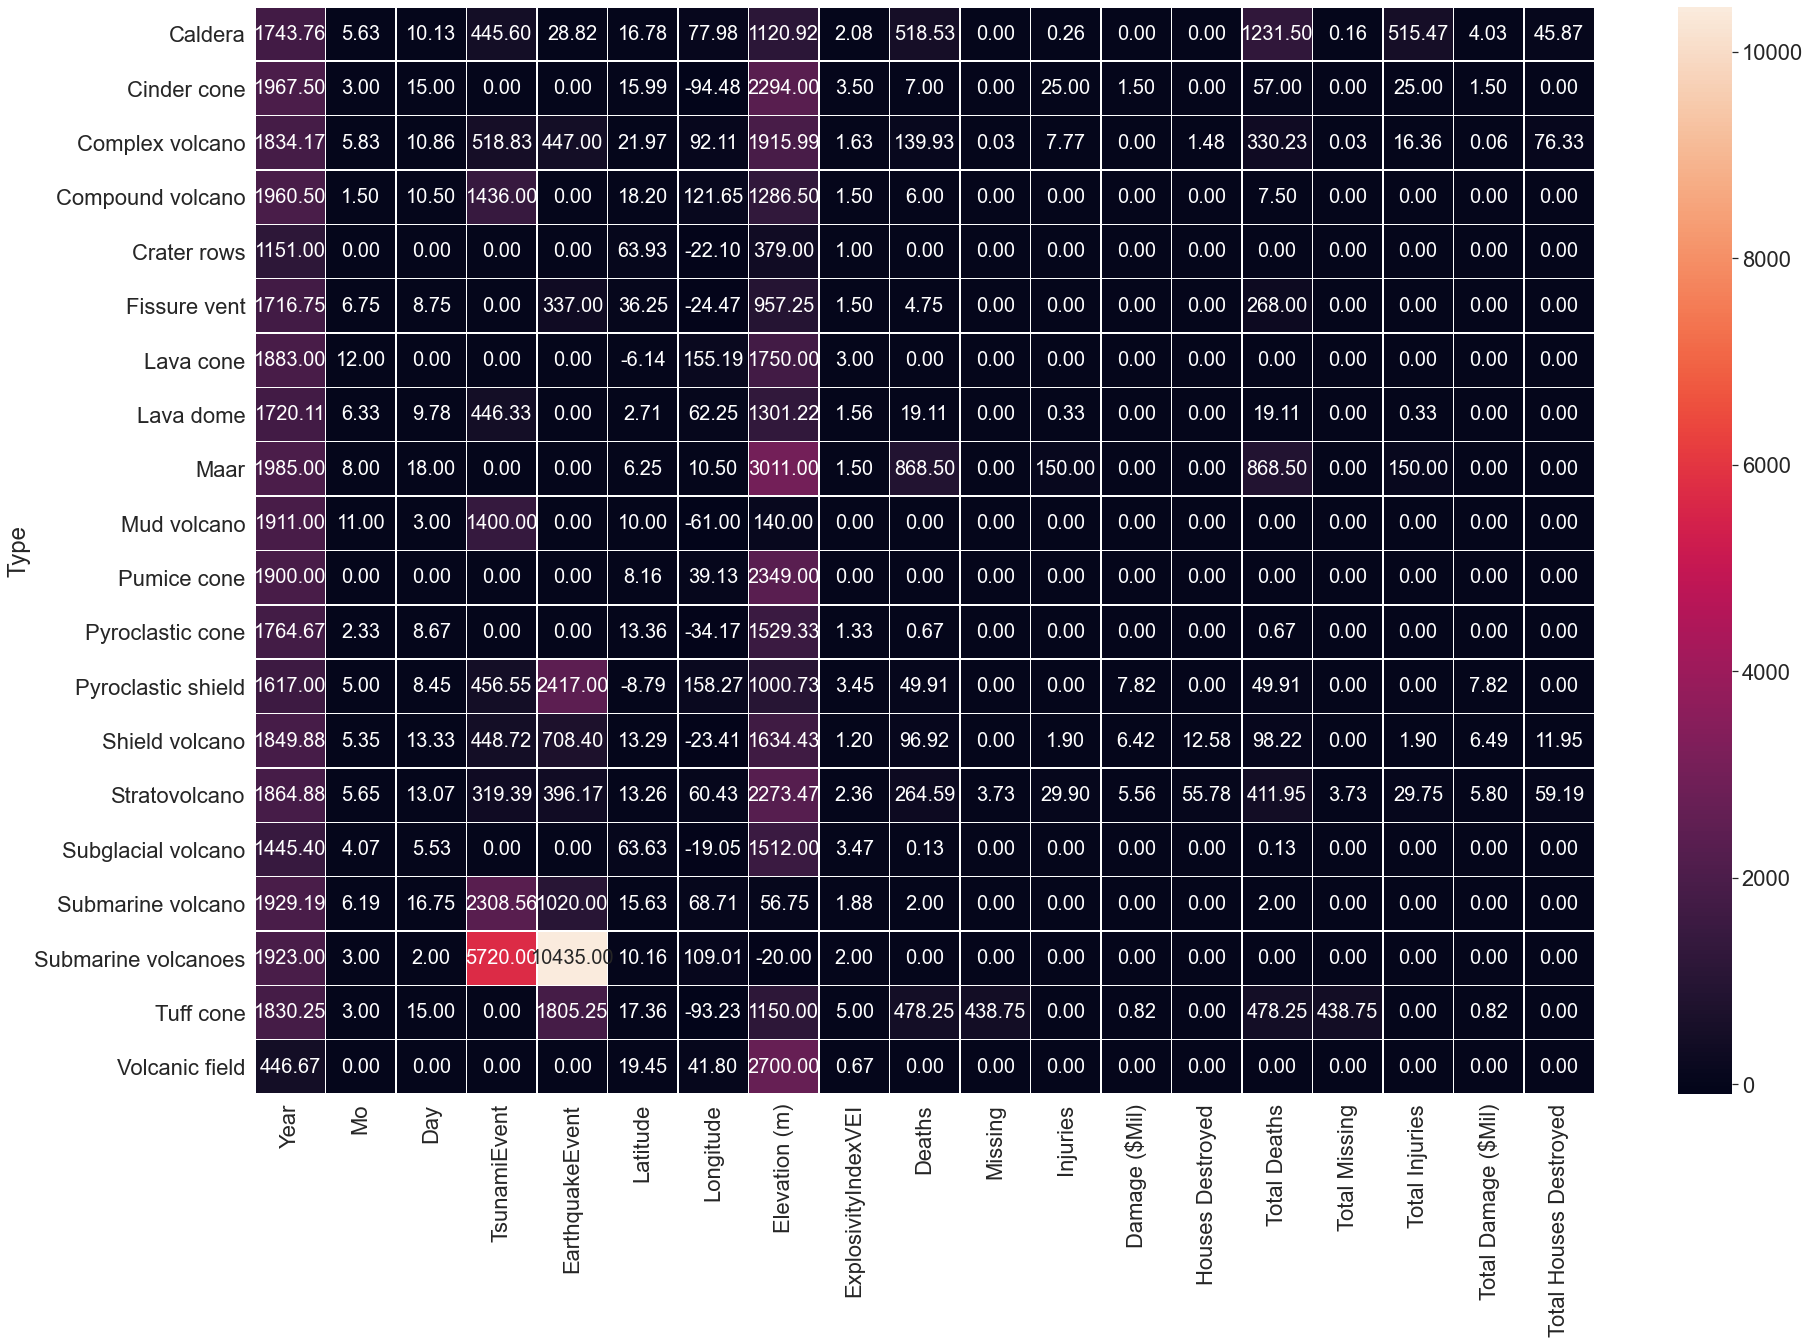

In [21]:
plt.rcParams['figure.figsize'] = (30.0, 20.0)
sns.set(font_scale=2)
ax = sns.heatmap(death_exp_corr, annot=True, fmt='.2f', linewidths=.5, 
                 annot_kws={'size': 20})

### Answer to Question: What are the classified commonalities between tsunamis triggered by eruptions or earthquakes?

Volcanoes don't have to errupt to cause a tsunami. A tsunami is triggered by underwater explosions and shock waves caused by large explosions - even ones that occur above the waterline. For this reason, earthquakes, whether tectonic or volcanic in origin, can cause landslides and debris avalanches.

Pyroclastic flows and lahars hitting the ocean can also displace water very quickly. This sends large displacement of water away from the point of impact. This also is the same for flank failures and sector collapses. They don't need an eruption of any size to happen. 

Any of these activity features can occur at any time (usually they do in combination). Which is why predicting tsunamis after a volcanic eruption is so difficult. 

### Answer to Question:  Which type of volcano tends to trigger tsunamis the most? 

Grouped by Type, we can see the most common volcano types that lead to tsunamis are Submarine Volcanos. This makes sense due to the movement of tectonic plates and eruptions under water level which cause water displacement.

Though further findings showed filtering only on volcanos with a high VEI and the earthquake event, a volcano is just as likely to lead to a tsunami.

### Answer to Question: Which type of volcano typically have higher VEI? 
The Volcanic Explosivity Index (or VEI) is a classification on the power and force a volcano erupts.

In the table below, volcanos are grouped by name, sorted by strongest VEI, and filtered by those that experienced both an earthquake event and a tsunami event.
 - Komagatake in 1640 with 5, a stratovolcano
 - St. Helens in 1980 with 5, a explosive dacite volcano
 - Vesuvius in 855 with 5, a stratovolcano
 - Makian in 1646 with 4, a stratovolcano
 - Rabaul in 1907 with 3.5, a caldera

In [22]:
high_vei = vdf.query("EarthquakeEvent >= 1 & TsunamiEvent >= 1" )
high_vei = high_vei.groupby(['Name']).mean()
high_vei.nlargest(5,'ExplosivityIndexVEI')

Year    Mo   Day  TsunamiEvent  EarthquakeEvent  Latitude  \
Name                                                                       
Komaga-take  1640.0   7.0  31.0         253.0            942.0    42.070   
St. Helens   1980.0   5.0  18.0        3018.0           4876.0    46.200   
Vesuvius      855.0  10.0  20.5        3111.0           4907.0    40.821   
Makian       1646.0   7.0  19.0        5754.0          10519.0     0.320   
Rabaul       1907.5   3.0  14.5        1396.5           8102.5    -4.271   

             Longitude  Elevation (m)  ExplosivityIndexVEI  Deaths  Missing  \
Name                                                                          
Komaga-take    140.680         1140.0                  5.0     0.0      0.0   
St. Helens    -122.180         2549.0                  5.0    57.0      0.0   
Vesuvius        14.426         1281.0                  5.0  3050.0      0.0   
Makian         127.400         1357.0                  4.0     0.0      0.0   
Rabaul         152.203          688.0                  3.5   254.0      0.0   

             Injuries  Damage ($Mil)  Houses Destroyed  Total Deaths  \
Name                                                                   
Komaga-take       0.0            0.0               0.0         700.0   
St. Helens        0.0         2000.0               0.0          61.0   
Vesuvius          0.0            0.0               0.0        3050.0   
Makian            0.0            0.0               0.0           0.0   
Rabaul            0.0            0.0               0.0         254.0   

             Total Missing  Total Injuries  Total Damage ($Mil)  \
Name                                                              
Komaga-take            0.0             0.0                  0.0   
St. Helens             0.0             0.0               2000.0   
Vesuvius               0.0             0.0                  0.0   
Makian                 0.0             0.0                  0.0   
Rabaul                 0.0             0.0                  0.0   

             Total Houses Destroyed  
Name                                 
Komaga-take                    20.0  
St. Helens                      0.0  
Vesuvius                        0.0  
Makian                          0.0  
Rabaul                          0.0

### Answer to Question: Which volcanos were (historically) the deadliest?
- Tambora
- Ilopango
- Ruiz
- Pelee
- Krakatau

In [32]:
# create a copy of the dataframe 
death_corr = vdf.copy() 

# group by Name 
death_corr = death_corr.groupby(['Name']).mean()
death_corr.nlargest(5,'Total Deaths')

Year        Mo        Day  TsunamiEvent  EarthquakeEvent  \
Name                                                                        
Tambora   1815.000000  4.000000  10.000000    613.000000              0.0   
Ilopango   450.000000  0.000000   0.000000      0.000000              0.0   
Ruiz      1808.333333  5.333333  14.666667      0.000000              0.0   
Pelee     1902.000000  5.750000  15.750000   1973.250000              0.0   
Krakatau  1768.444444  6.000000  15.000000   2016.111111              0.0   

          Latitude  Longitude  Elevation (m)  ExplosivityIndexVEI  \
Name                                                                
Tambora     -8.250    118.000         2850.0             7.000000   
Ilopango    13.672    -89.053          450.0             6.000000   
Ruiz         4.895    -75.322         5321.0             3.333333   
Pelee       14.820    -61.170         1397.0             2.000000   
Krakatau    -6.102    105.423          813.0             1.666667   

                Deaths  Missing     Injuries  Damage ($Mil)  Houses Destroyed  \
Name                                                                            
Tambora   11000.000000      0.0     0.000000            0.0               0.0   
Ilopango  30000.000000      0.0     0.000000            0.0               0.0   
Ruiz       8238.666667      0.0  3333.333333            0.0               0.0   
Pelee      7380.750000      0.0     0.000000            0.0               0.0   
Krakatau    222.333333      0.0     0.555556            0.0               0.0   

          Total Deaths  Total Missing  Total Injuries  Total Damage ($Mil)  \
Name                                                                         
Tambora   60000.000000       0.000000        0.000000             0.000000   
Ilopango  30000.000000       0.000000        0.000000             0.000000   
Ruiz       8238.666667       0.000000     3333.333333             0.000000   
Pelee      7380.750000       0.000000        0.000000             0.000000   
Krakatau   4095.000000       1.111111     3549.777778            27.777778   

          Total Houses Destroyed  
Name                              
Tambora                      0.0  
Ilopango                     0.0  
Ruiz                         0.0  
Pelee                        0.0  
Krakatau                   316.0

These volcanos while deadly, didn't always result in a tsunami or an earthquake event.
In the next cell, the results filter only volcano explosions that had both an earthquake and tsunami event. Again grouped by name and sorted by total deaths. 

In [33]:
# Analyze all volcanos who had an earthquake and tsunami event, group by name and sort by total deaths.
eq_ts_deadly = vdf.query("EarthquakeEvent >= 1 & TsunamiEvent >= 1" )
eq_ts_deadly = eq_ts_deadly.groupby(['Name']).mean()
eq_ts_deadly.nlargest(5,'Total Deaths')

Year         Mo        Day  TsunamiEvent  EarthquakeEvent  \
Name                                                                            
Unzen        1792.000000   5.000000  21.000000    568.000000      1515.000000   
Etna         1455.333333   5.666667  12.333333   3138.333333      6120.333333   
Vesuvius      855.000000  10.000000  20.500000   3111.000000      4907.000000   
Awu          1884.500000   3.000000   8.000000   1133.000000      2484.000000   
Komaga-take  1640.000000   7.000000  31.000000    253.000000       942.000000   

             Latitude  Longitude  Elevation (m)  ExplosivityIndexVEI  Deaths  \
Name                                                                           
Unzen          32.750    130.300         1500.0                  2.0     0.0   
Etna           37.734     15.004         3350.0                  1.0     0.0   
Vesuvius       40.821     14.426         1281.0                  5.0  3050.0   
Awu             3.670    125.500         1320.0                  2.5  1403.0   
Komaga-take    42.070    140.680         1140.0                  5.0     0.0   

             Missing  Injuries  Damage ($Mil)  Houses Destroyed  Total Deaths  \
Name                                                                            
Unzen            0.0       0.0            0.0               0.0  15000.000000   
Etna             0.0       0.0            0.0               0.0   5333.333333   
Vesuvius         0.0       0.0            0.0               0.0   3050.000000   
Awu              0.0       0.0            0.0               0.0   1472.000000   
Komaga-take      0.0       0.0            0.0               0.0    700.000000   

             Total Missing  Total Injuries  Total Damage ($Mil)  \
Name                                                              
Unzen                  0.0           707.0                  0.0   
Etna                   0.0             0.0                  0.0   
Vesuvius               0.0             0.0                  0.0   
Awu                    0.0             0.0                  0.0   
Komaga-take            0.0             0.0                  0.0   

             Total Houses Destroyed  
Name                                 
Unzen                        6200.0  
Etna                            0.0  
Vesuvius                        0.0  
Awu                             0.0  
Komaga-take                    20.0

The deadliest volcanoes that had both tsunamis and an earthquake event were:
- Unzen in 1792 with 15k deaths
- Etna in 1455 with 5300 deaths
- Vesuvius in 855 with 3050 deaths
- Awu in 1884 with 1472 deaths
- Komagatake in 1640 with 700 deaths

# Predicting 
Activity By Volcano as it correlates with explositivity and earthquakes

In [34]:
key_vars = ['Deaths', 'TsunamiEvent','ExplosivityIndexVEI' , 'EarthquakeEvent']

# import the StandardScaler
from sklearn.preprocessing import StandardScaler

# extract out the numerical data and scale it to zero mean and unit standard deviation
X = vdf[key_vars]
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index = X.index)


In [26]:
#k = vdf.nunique() 
#from sklearn.cluster import KMeans
#kcluster = KMeans(n_clusters=k).fit(X_scaled)

In [27]:
all_inputs = vdf[['EarthquakeEvent','TsunamiEvent','ExplosivityIndexVEI' ]].values

all_labels = vdf['EarthquakeEvent'].values

all_inputs[:1]

array([[ 0., 21.,  3.]])

In [28]:
# Train and split the data
X_train, X_test, y_train, y_test = train_test_split(all_inputs, 
                                                    all_labels, 
                                                    test_size= 0.2, 
                                                    random_state=42)

In [29]:
X_train[:1]

array([[0., 0., 2.]])

In [30]:
decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test, y_test)

0.9079754601226994

In [31]:
# Extra code
#eq_vdf = vdf.query("EarthquakeEvent >= 1") 
